In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import sys
from os import system
from IPython.display import clear_output
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import phik 
import seaborn as sns
from phik import resources, report
from phik.report import plot_correlation_matrix
from itertools import combinations
import random
from tabulate import tabulate
from IPython.display import display, HTML
import graphviz
import networkx as nx
import itertools

In [2]:
import sys

class add_path():
    def __init__(self, path):
        self.path = path

    def __enter__(self):
        sys.path.insert(0, self.path)

    def __exit__(self, exc_type, exc_value, traceback):
        try:
            sys.path.remove(self.path)
        except ValueError:
            pass
with add_path('/home/hshadman/.local/lib/python3.7/site-packages'):
    matplotlib = __import__('matplotlib')

In [3]:
matplotlib.__version__

'3.5.3'

# CNV scratch work
# ONLY TCGA BRCA

In [65]:
pan_tcga_sample_info = pd.read_csv("../gtex_and_tcga/TcgaTargetGTEX_phenotype.txt.gz",sep='\t',encoding='latin-1')


In [30]:
CNV = pd.read_csv('TCGA.BRCA.sampleMap_Gistic2_CopyNumber_Gistic2_all_data_by_genes.gz',sep='\t')

CNV['gene_means'] = CNV.set_index('Gene Symbol').mean(axis=1).values
CNV['gene_std'] = CNV.set_index('Gene Symbol').std(axis=1).values
CNV = CNV.sort_values(by='gene_means',ascending=False,key=abs)
CNV

,Gene Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,...,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,gene_means,gene_std
10657,MYC,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.265,-0.003,-0.205,0.294,0.000,0.085,1.371,0.736964,0.936395
10655,CASC8,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.272,-0.003,-0.205,0.294,0.000,0.085,1.371,0.725523,0.919620
10658,PVT1,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.265,-0.003,-0.205,0.294,0.000,0.085,1.371,0.725323,0.928711
10656,POU5F1B,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.272,-0.003,-0.205,0.294,0.000,0.085,1.371,0.715536,0.903698
10583,TRPS1,0.222,0.465,1.152,0.026,0.973,-0.002,0.000,0.563,0.002,...,1.418,0.272,-0.003,-0.205,0.294,0.000,0.085,1.371,0.714785,0.921615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13350,OR5AK2,0.184,0.007,0.015,0.018,0.002,0.000,-0.002,-0.630,0.001,...,0.015,-0.008,0.006,0.040,-0.378,0.016,-0.156,-0.811,0.000047,0.387907
2569,NBAS,-0.447,0.434,0.374,-0.003,-0.292,-0.006,0.000,0.008,-0.001,...,-0.006,0.000,-0.002,0.002,-0.083,-0.249,-0.095,-0.004,-0.000029,0.276704
17760,VPS33B,0.118,-0.016,-0.327,0.025,0.105,0.017,0.005,-0.053,0.002,...,0.003,0.478,-0.537,-0.744,0.013,0.027,-0.150,-0.056,0.000023,0.356909
2560,LPIN1,-0.447,0.434,0.374,-0.003,-0.292,-0.006,0.000,0.008,-0.001,...,-0.006,0.000,-0.002,0.002,-0.083,-0.526,-0.095,-0.004,-0.000016,0.294925


In [59]:
#CNV = CNV.set_index('Gene Symbol')

CNV.set_index('Gene Symbol').mean(axis=1)

Gene Symbol
ACAP3                       -0.141105
ACTRT2                      -0.141105
AGRN                        -0.141105
ANKRD65                     -0.141105
ATAD3A                      -0.141105
                               ...   
IL9R|ENSG00000124334.12      0.015914
SPRY3|ENSG00000168939.6      0.015914
VAMP7|ENSG00000124333.10     0.015914
WASH6P|ENSG00000182484.10    0.015914
WASIR1|ENSG00000185203.7     0.015914
Length: 24776, dtype: float64

In [31]:
unwanted_integrins = ['ITGB3BP','ITGB1BP1','ITGB5-AS1','ITGA9-AS1','ITGB1P1','ITGB2-AS1', 'ITGB1BP2','ITGB1BP3']
CNV_ITG = CNV[CNV['Gene Symbol'].str.contains('ITG')].copy()

CNV_ITG = CNV_ITG[~CNV_ITG['Gene Symbol'].isin(unwanted_integrins)].copy()

#CNV_ITG = CNV_ITG.set_index('Gene Symbol')

CNV_ITG


,Gene Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,...,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,gene_means,gene_std
1330,ITGA10,0.216,-0.448,0.083,-0.023,0.000,0.555,-0.002,1.239,0.002,...,0.000,0.900,0.939,1.855,-0.071,0.012,0.486,0.669,0.546976,0.680845
18295,ITGAL,0.053,0.032,0.008,0.025,0.027,0.039,0.005,-0.049,0.002,...,1.224,0.482,0.018,0.536,0.016,0.039,0.491,1.401,0.301381,0.478821
18335,ITGAX,0.053,0.032,0.008,0.025,0.027,0.039,0.005,-0.049,0.002,...,1.224,0.482,0.018,0.536,0.016,0.039,0.491,1.401,0.293425,0.482687
18336,ITGAD,0.053,0.032,0.008,0.025,0.027,0.039,0.005,-0.049,0.002,...,1.224,0.482,0.018,0.536,0.016,0.039,0.491,1.401,0.292823,0.481301
18334,ITGAM,0.053,0.032,0.008,0.025,0.027,0.039,0.005,-0.049,0.002,...,1.224,0.482,0.018,0.536,0.016,0.039,0.491,1.401,0.291744,0.473674
18902,ITGAE,-0.567,-0.525,-0.694,-0.644,-0.696,-0.548,0.005,0.297,-0.002,...,0.072,-0.481,-0.518,-0.183,0.008,-0.512,0.009,-0.768,-0.248813,0.346842
19755,ITGA3,0.078,2.475,-0.690,2.286,0.289,0.020,0.005,0.334,0.002,...,0.047,0.005,0.023,-0.203,0.008,-0.512,0.009,0.031,0.224686,0.754992
20039,ITGB4,0.015,0.306,0.409,1.694,0.289,0.013,0.005,0.309,-0.000,...,0.045,0.024,0.021,-0.203,0.008,-0.513,0.009,0.036,0.193205,0.508750
8887,ITGB8,0.227,0.449,-0.139,0.011,-0.004,0.001,-0.376,-0.459,0.006,...,0.024,0.248,-0.001,0.396,-0.002,0.006,-0.008,0.018,0.125204,0.406803
11923,ITGA8,-0.483,-0.461,0.034,0.014,0.009,0.005,0.003,0.516,-0.001,...,0.018,-0.003,-0.006,0.034,0.000,0.015,-0.004,0.679,0.112710,0.396259


In [48]:
#Warning - saved file contains female and male breast
#CNV_ITG.to_csv('CNV_27_integrins_gistic2.csv',index=False)



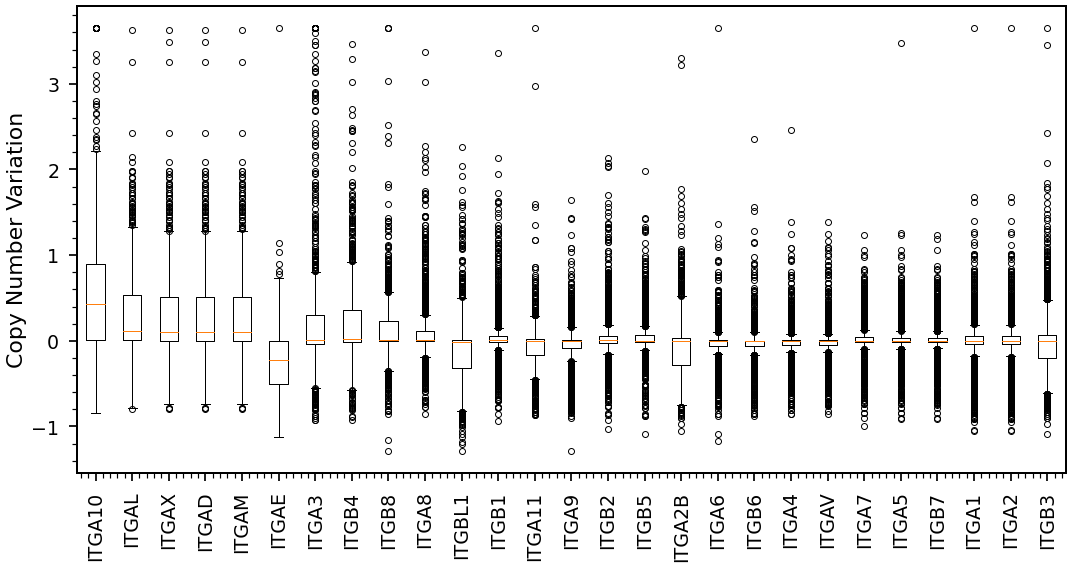

In [46]:
fig, ax = plt.subplots(figsize = (15,8))
df = CNV_ITG[(CNV_ITG.columns[CNV_ITG.columns.str.contains('TCGA')]) | (CNV_ITG.columns[CNV_ITG.columns.str.contains('Symbol')])].copy()
ax.boxplot(df.set_index('Gene Symbol').T)
ax.set_xticklabels(df.set_index('Gene Symbol').T.columns)
plt.setp(ax.get_xticklabels(),fontsize=19,rotation=90)
#    ax.xticks(fontsize=18)
plt.setp(ax.get_yticklabels(),fontsize=19)
#    ax.set_yticks(fontsize=16)
ax.set_ylabel('Copy Number Variation',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(2)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


fig.tight_layout()




/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


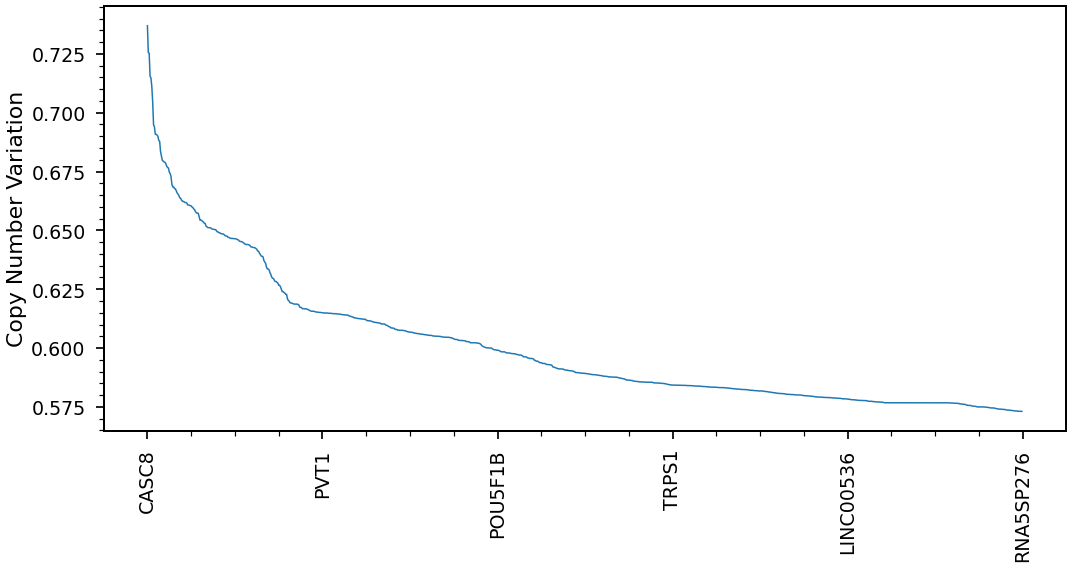

In [51]:


fig, ax = plt.subplots(figsize = (15,8))
n = 1000
ax.plot(CNV[:n]['gene_means'].values)
ax.set_xticklabels(CNV[:n]['Gene Symbol'].values)
plt.setp(ax.get_xticklabels(),fontsize=1,rotation=90)
#    ax.xticks(fontsize=18)
plt.setp(ax.get_yticklabels(),fontsize=19)
#    ax.set_yticks(fontsize=16)
ax.set_ylabel('Copy Number Variation',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(2)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)    


fig.tight_layout()




In [59]:
CNV.reset_index(drop=True)[CNV.reset_index(drop=True)['Gene Symbol']=='ITGA10']

,Gene Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5L-AAT1-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,...,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,gene_means,gene_std
1516,ITGA10,0.216,-0.448,0.083,-0.023,0.0,0.555,-0.002,1.239,0.002,...,0.0,0.9,0.939,1.855,-0.071,0.012,0.486,0.669,0.546976,0.680845


In [79]:
pan_tcga_sample_info



,sample,detailed_category,primary disease or tissue,_primary_site,_sample_type,_gender,_study
0,TCGA-V4-A9EE-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
1,TCGA-VD-AA8N-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
2,TCGA-V4-A9EI-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
3,TCGA-VD-AA8O-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
4,TCGA-WC-A888-01,Uveal Melanoma,Uveal Melanoma,Eye,Primary Tumor,Male,TCGA
...,...,...,...,...,...,...,...
19126,TARGET-20-PANPKN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19127,TARGET-20-PANLIR-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19128,TARGET-20-PAPAWN-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET
19129,TARGET-20-PANPTM-09,Acute Myeloid Leukemia,Acute Myeloid Leukemia,White blood cell,Primary Blood Derived Cancer - Bone Marrow,Male,TARGET


# CNV TCGA PAN CANCER

In [83]:
chosen_tissues = ['Lung','Breast','Prostate','Stomach','Pancreas','Testis','Liver','Colon']
sample_info_chostiss=pan_tcga_sample_info[(pan_tcga_sample_info._primary_site.isin(chosen_tissues)) & (pan_tcga_sample_info._study=='TCGA')]
sample_info_chostiss.detailed_category.value_counts()

Breast Invasive Carcinoma         1212
Lung Adenocarcinoma                574
Prostate Adenocarcinoma            548
Lung Squamous Cell Carcinoma       548
Stomach Adenocarcinoma             450
Liver Hepatocellular Carcinoma     421
Colon Adenocarcinoma               331
Pancreatic Adenocarcinoma          183
Testicular Germ Cell Tumor         154
Name: detailed_category, dtype: int64

In [ ]:
CNV_pancanc = pd.read_csv('TCGA.PANCAN.sampleMap_Gistic2_CopyNumber_Gistic2_all_data_by_genes.gz',sep='\t')

# CNV_pancanc['gene_means'] = CNV_pancanc.set_index('Gene Symbol').mean(axis=1).values
# CNV_pancanc['gene_std'] = CNV_pancanc.set_index('Gene Symbol').std(axis=1).values
# CNV_pancanc = CNV_pancanc.sort_values(by='gene_means',ascending=False,key=abs)
